Assignment(2): Bengaluru House Price Predition
Target Variable: `price` (in lakhs ₹)   
Features: Area, loca on, size, bedrooms, bathrooms, etc. 

Tasks 
1. Data Loading & Exploration (15 ) 
- Load the dataset using `pandas`. 
- Perform initial EDA: 
   - Check for missing values 
   - Identify categorical vs numerical features 
   - Plot distribution of `price` (handle skewness if needed) 
   - Detect and document outliers in key features (`total_sq `, `price`) 

In [152]:
import pandas as pd
import numpy as np

df = pd.read_csv("bengaluru_house_prices.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


Tasks 
1. Data Loading & Exploration (15 ) 
- Load the dataset using `pandas`. 
- Perform initial EDA: - Check for missing values 
- Identify categorical vs numerical features 
- Plot distribution of `price` (handle skewness if needed) 
- Detect and document outliers in key features (`total_sq `, `price`) 

In [153]:
df.info

<bound method DataFrame.info of                   area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.

In [154]:
df.describe

<bound method NDFrame.describe of                   area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   

In [155]:
print("shape: ", df.shape)

shape:  (13320, 9)


🧹 Step-by-Step: Data Cleaning Blocks

In [156]:
# ✅ 1. Check Missing Values
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [157]:
# ✅ 2. Clean the size Column to Extract bhk
df['bhk'] = df['size'].apply(lambda x: int(str(x).split(' ')[0]) if pd.notnull(x) else np.nan)

What to Observe:
This creates a new column bhk.
Example: '3 BHK' becomes 3, '2 Bedroom' becomes 2.

In [158]:
df[['size', 'bhk']].head(10)

,size,bhk
0,2 BHK,2.0
1,4 Bedroom,4.0
2,3 BHK,3.0
3,3 BHK,3.0
4,2 BHK,2.0
5,2 BHK,2.0
6,4 BHK,4.0
7,4 BHK,4.0
8,3 BHK,3.0
9,6 Bedroom,6.0


In [159]:
# ✅ 3. Clean the total_sqft Column
def clean_sqft(x):
    try:
        if '-' in str(x):
            low, high = map(float, x.split('-'))
            return (low + high) / 2
        return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(clean_sqft)

What to Observe:
Values like '1000-1500' become 1250.0.
It skips any weird non-numeric values using the try-except block.

In [160]:
# Check a few rows:
df[['total_sqft']].head(10)

,total_sqft
0,1056.0
1,2600.0
2,1440.0
3,1521.0
4,1200.0
5,1170.0
6,2732.0
7,3300.0
8,1310.0
9,1020.0


In [161]:
# ✅ 4. Remove Outliers

# Remove rows with sqft per BHK less than 300
df = df[df['total_sqft'] / df['bhk'] >= 300]

# Remove rows with very large total_sqft
df = df[df['total_sqft'] <= 10000]

Why:
Usually, houses with less than 300 sqft per BHK are unrealistic.
And very large houses (like palaces) can distort the model.

In [162]:
# Check shape after cleaning:
df.shape

(12491, 10)

In [163]:
# 🧩 Step 4: Feature Engineering (Breakdown)
# ✅ 4.1 Create price_per_sqft
df['price_per_sqft'] = (df['price'] * 100000) / df['total_sqft']
df['price_per_sqft'].head()

0    3699.810606
1    4615.384615
2    4305.555556
3    6245.890861
4    4250.000000
Name: price_per_sqft, dtype: float64

📌 Explanation:
Price is in lakhs, so we convert to ₹ by * 100000.
Divide by total_sqft to get ₹ per square foot.

✅ 4.2 Handle Rare Locations (Cluster them as "Other")
Too many unique values can confuse the model. We will:
Count how often each location appears
Keep frequent ones, group the rest as "Other"

In [164]:
location_stats = df['location'].value_counts()
rare_locations = location_stats[location_stats <= 10].index
df['location'] = df['location'].apply(lambda x: 'Other' if x in rare_locations else x)
df['location'].value_counts()

location
Other                        2713
Whitefield                    534
Sarjapur  Road                393
Electronic City               293
Kanakpura Road                269
                             ... 
Narayanapura                   11
Vasanthapura                   11
Banashankari Stage VI          11
2nd Phase Judicial Layout      11
Doddaballapur                  11
Name: count, Length: 223, dtype: int64

In [165]:
# ✅ 4.3 One-Hot Encode location and availability
df = pd.get_dummies(df, columns=['location', 'availability'], drop_first=True)
df.head()

,area_type,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft,location_1st Phase JP Nagar,...,availability_21-Nov,availability_21-Oct,availability_21-Sep,availability_22-Dec,availability_22-Jan,availability_22-Jun,availability_22-Mar,availability_22-May,availability_22-Nov,availability_Ready To Move
0,Super built-up Area,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2.0,3699.810606,False,...,False,False,False,False,False,False,False,False,False,False
1,Plot Area,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4.0,4615.384615,False,...,False,False,False,False,False,False,False,False,False,True
2,Built-up Area,3 BHK,NaN,1440.0,2.0,3.0,62.00,3.0,4305.555556,False,...,False,False,False,False,False,False,False,False,False,True
3,Super built-up Area,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3.0,6245.890861,False,...,False,False,False,False,False,False,False,False,False,True
4,Super built-up Area,2 BHK,NaN,1200.0,2.0,1.0,51.00,2.0,4250.000000,False,...,False,False,False,False,False,False,False,False,False,True


In [166]:
df['price_per_sqft'] = np.log1p(df['price_per_sqft'])
df['price'] = np.log1p(df['price'])
df

,area_type,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqft,location_1st Phase JP Nagar,...,availability_21-Nov,availability_21-Oct,availability_21-Sep,availability_22-Dec,availability_22-Jan,availability_22-Jun,availability_22-Mar,availability_22-May,availability_22-Nov,availability_Ready To Move
0,Super built-up Area,2 BHK,Coomee,1056.0,2.0,1.0,3.690628,2.0,8.216307,False,...,False,False,False,False,False,False,False,False,False,False
1,Plot Area,4 Bedroom,Theanmp,2600.0,5.0,3.0,4.795791,4.0,8.437367,False,...,False,False,False,False,False,False,False,False,False,True
2,Built-up Area,3 BHK,NaN,1440.0,2.0,3.0,4.143135,3.0,8.367894,False,...,False,False,False,False,False,False,False,False,False,True
3,Super built-up Area,3 BHK,Soiewre,1521.0,3.0,1.0,4.564348,3.0,8.739839,False,...,False,False,False,False,False,False,False,False,False,True
4,Super built-up Area,2 BHK,NaN,1200.0,2.0,1.0,3.951244,2.0,8.354910,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,5.446737,5.0,8.808494,False,...,False,False,False,False,False,False,False,False,False,True
13316,Super built-up Area,4 BHK,NaN,3600.0,5.0,NaN,5.993961,4.0,9.315791,False,...,False,False,False,False,False,False,False,False,False,True
13317,Built-up Area,2 BHK,Mahla T,1141.0,2.0,1.0,4.110874,2.0,8.567800,False,...,False,False,False,False,False,False,False,False,False,True
13318,Super built-up Area,4 BHK,SollyCl,4689.0,4.0,1.0,6.192362,4.0,9.250362,False,...,False,False,False,False,False,False,False,False,False,False


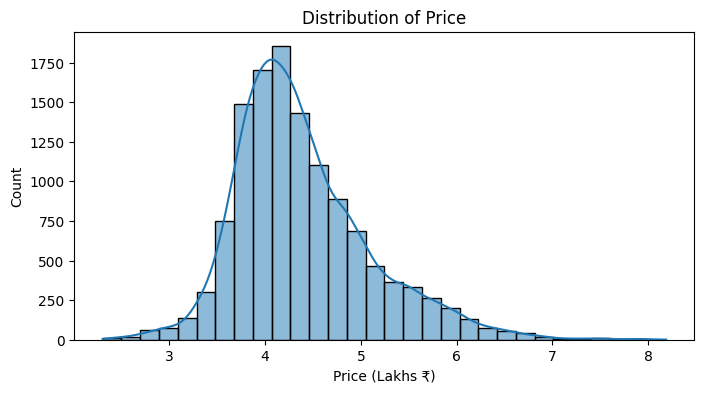

Skewness: 0.9143734411493231


In [167]:
# 4️⃣ Plot Distribution of price (and handle skewness)
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of price
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of Price')
plt.xlabel('Price (Lakhs ₹)')
plt.show()

# Check skewness
print("Skewness:", df['price'].skew())


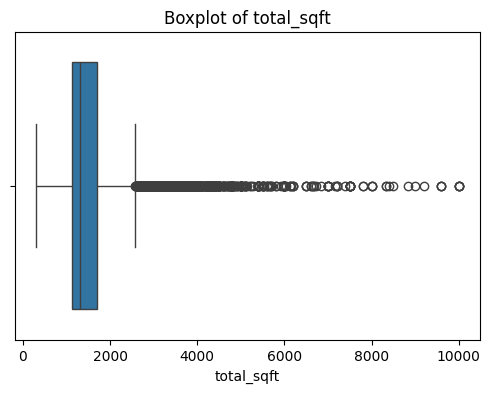

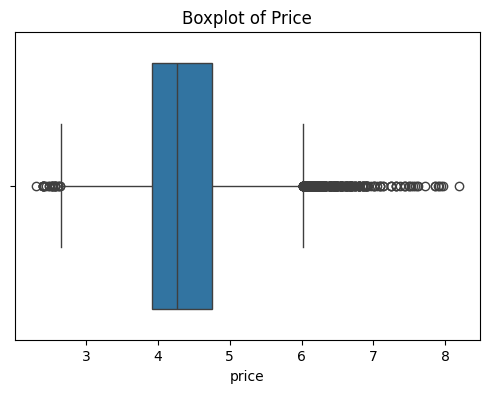

In [168]:
# 5️⃣ Detect and Document Outliers in total_sqft and price

# Boxplot for total_sqft
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['total_sqft'])
plt.title("Boxplot of total_sqft")
plt.show()

# Boxplot for price
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['price'])
plt.title("Boxplot of Price")
plt.show()

In [169]:
df[['price', 'total_sqft']].describe()

,price,total_sqft
count,12491.000000,12491.000000
mean,4.389180,1560.803397
std,0.707065,859.720852
min,2.302585,300.000000
25%,3.912023,1115.000000
50%,4.262680,1300.000000
75%,4.753590,1700.000000
max,8.188967,10000.000000


In [175]:
df.dtypes

area_type                      object
size                           object
society                        object
total_sqft                    float64
bath                          float64
                               ...   
availability_22-Jun              bool
availability_22-Mar              bool
availability_22-May              bool
availability_22-Nov              bool
availability_Ready To Move       bool
Length: 310, dtype: object

In [180]:
# Get only numeric columns (int or float)
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

In [181]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform only numeric columns
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [185]:
# Show summary of numeric columns before scaling
X_train[numeric_cols].describe()

,total_sqft,bath,balcony,price,price_per_sqft
count,8743.000000,8703.000000,8399.000000,8743.000000,8743.000000
mean,1566.302726,2.565552,1.583879,4.395306,8.638412
std,865.457619,1.079699,0.806666,0.710362,0.439491
min,300.000000,1.000000,0.000000,2.302585,7.131699
25%,1125.000000,2.000000,1.000000,3.929470,8.347338
50%,1302.000000,2.000000,2.000000,4.262680,8.577485
75%,1708.000000,3.000000,2.000000,4.753590,8.841834
max,10000.000000,16.000000,3.000000,7.937732,12.080915


In [186]:
# Show summary of numeric columns after scaling
X_train_scaled[numeric_cols].describe()

,total_sqft,bath,balcony,price,price_per_sqft
count,8.743000e+03,8.703000e+03,8.399000e+03,8.743000e+03,8.743000e+03
mean,-1.851938e-16,-1.330788e-16,1.285897e-16,2.684954e-16,-1.219049e-17
std,1.000057e+00,1.000057e+00,1.000060e+00,1.000057e+00,1.000057e+00
min,-1.463243e+00,-1.450073e+00,-1.963606e+00,-2.946163e+00,-3.428508e+00
25%,-5.099360e-01,-5.238355e-01,-7.238610e-01,-6.558113e-01,-6.623359e-01
50%,-3.054082e-01,-5.238355e-01,5.158838e-01,-1.867135e-01,-1.386380e-01
75%,1.637346e-01,4.024019e-01,5.158838e-01,5.043970e-01,4.628834e-01
max,9.745341e+00,1.244349e+01,1.755629e+00,4.987077e+00,7.833372e+00


4. Model Building (25 ) 
Implement and compare 3 regression models: 
1. Linear Regression (baseline) 
2. Random Forest Regressor 
3. XGBoost Regressor

In [188]:
# ✅ Step 4.1: Train-Test Split , We'll split the data into: 70% for training, 30% for testing

from sklearn.model_selection import train_test_split

X = df.drop(['price'], axis =1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [190]:
X.select_dtypes(include=['object']).head()

,area_type,size,society
0,Super built-up Area,2 BHK,Coomee
1,Plot Area,4 Bedroom,Theanmp
2,Built-up Area,3 BHK,NaN
3,Super built-up Area,3 BHK,Soiewre
4,Super built-up Area,2 BHK,NaN


In [191]:
X = pd.get_dummies(X, drop_first=True)

In [192]:
X.isnull().sum()

total_sqft           0
bath                57
balcony            496
bhk                  0
price_per_sqft       0
                  ... 
society_Zonce E      0
society_Zostaa       0
society_i1ncyRe      0
society_i1odsne      0
society_i1rtsCo      0
Length: 2988, dtype: int64

In [193]:
X = X.fillna(X.median(numeric_only=True))  # Safe imputation for any missed numeric NaNs

In [194]:
X.isnull().sum()

total_sqft         0
bath               0
balcony            0
bhk                0
price_per_sqft     0
                  ..
society_Zonce E    0
society_Zostaa     0
society_i1ncyRe    0
society_i1odsne    0
society_i1rtsCo    0
Length: 2988, dtype: int64

In [195]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [197]:
X.dtypes

total_sqft         float64
bath               float64
balcony            float64
bhk                float64
price_per_sqft     float64
                    ...   
society_Zonce E       bool
society_Zostaa        bool
society_i1ncyRe       bool
society_i1odsne       bool
society_i1rtsCo       bool
Length: 2988, dtype: object

In [198]:
X = pd.get_dummies(X, drop_first=True)

In [199]:
print(X.dtypes)             # All should be int or float
print(X.isnull().sum())     # All should be 0

total_sqft         float64
bath               float64
balcony            float64
bhk                float64
price_per_sqft     float64
                    ...   
society_Zonce E       bool
society_Zostaa        bool
society_i1ncyRe       bool
society_i1odsne       bool
society_i1rtsCo       bool
Length: 2988, dtype: object
total_sqft         0
bath               0
balcony            0
bhk                0
price_per_sqft     0
                  ..
society_Zonce E    0
society_Zostaa     0
society_i1ncyRe    0
society_i1odsne    0
society_i1rtsCo    0
Length: 2988, dtype: int64


In [200]:
X = X.astype(float)

In [201]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_scaled, y)

LinearRegression()

In [148]:
# # ✅ Step 4.2: Feature Scaling (for Linear Regression)- This is done before Linear Regression

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [203]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict using trained model
y_pred = model.predict(X_scaled)

# Evaluation Metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.05
Root Mean Squared Error (RMSE): 0.08
R² Score: 0.9862


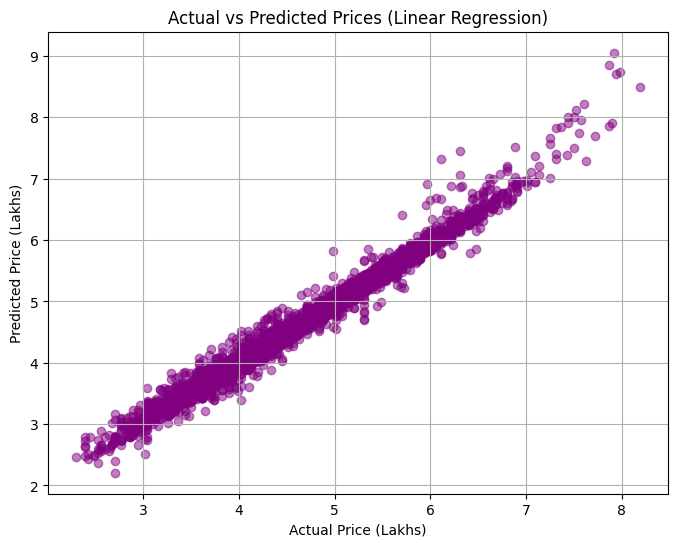

In [204]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5, color='purple')
plt.xlabel("Actual Price (Lakhs)")
plt.ylabel("Predicted Price (Lakhs)")
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.grid(True)
plt.show()

In [205]:
# 🛠️ Code: Train Random Forest

from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_scaled, y)

# Predict
y_rf_pred = rf_model.predict(X_scaled)

# Evaluate
rf_mse = mean_squared_error(y, y_rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y, y_rf_pred)
rf_r2 = r2_score(y, y_rf_pred)

print(f"Random Forest MAE: {rf_mae:.2f}")
print(f"Random Forest RMSE: {rf_rmse:.2f}")
print(f"Random Forest R² Score: {rf_r2:.4f}")

Random Forest MAE: 0.00
Random Forest RMSE: 0.01
Random Forest R² Score: 0.9998


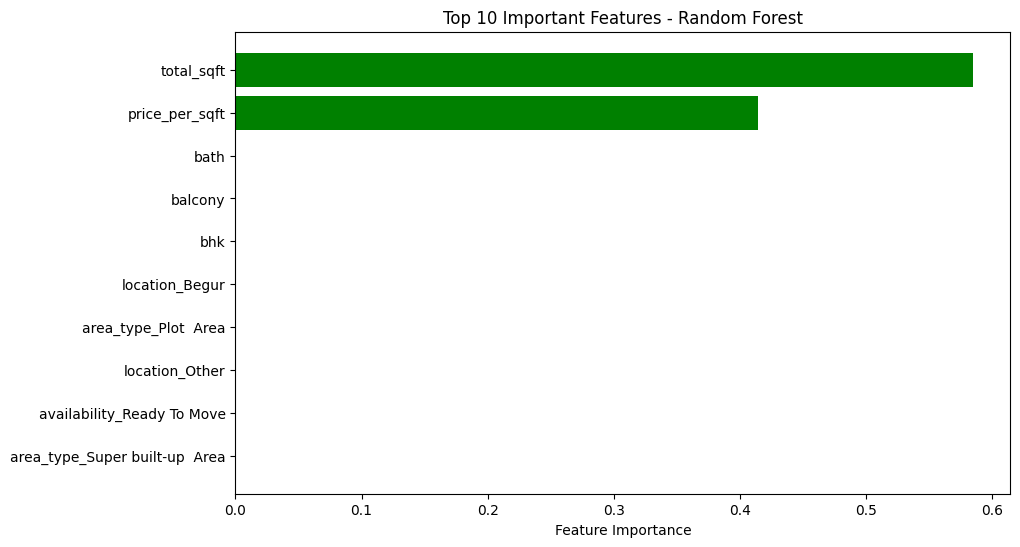

In [206]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='green')
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features - Random Forest")
plt.gca().invert_yaxis()
plt.show()

In [207]:
# ✅ Step 5.2: XGBoost Regressor
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.6/150.0 MB 9.3 MB/s eta 0:00:16
    --------------------------------------- 2.9/150.0 MB 7.6 MB/s eta 0:00:20
   - -------------------------------------- 4.2/150.0 MB 7.2 MB/s eta 0:00:21
   - -------------------------------------- 5.0/150.0 MB 6.4 MB/s eta 0:00:23
   - -------------------------------------- 5.8/150.0 MB 6.0 MB/s eta 0:00:25
   - -------------------------------------- 6.8/150.0 MB 5.7 MB/s eta 0:00:25
   -- ------------------------------------- 7.9/150.0 MB 5.7 MB/s eta 0:00:26
   -- ------------------------------------- 9.2/150.0 MB 5.6 MB/s eta 0:00:25
   -- ------------------------------------- 10.2/150.0 MB 5.6 MB/s eta 0:00:25
   -- ------------------------------------- 11.0/150.0 MB 5.3 MB/s eta 0:00:27
   --- ------------------------------------ 12.1/150.0 MB 5.3 MB/s et

In [208]:
import xgboost as xgb

# Initialize model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Fit on training data
xgb_model.fit(X_scaled, y)

# Predict
y_xgb_pred = xgb_model.predict(X_scaled)

# Evaluate
xgb_mse = mean_squared_error(y, y_xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mae = mean_absolute_error(y, y_xgb_pred)
xgb_r2 = r2_score(y, y_xgb_pred)

print(f"XGBoost MAE: {xgb_mae:.2f}")
print(f"XGBoost RMSE: {xgb_rmse:.2f}")
print(f"XGBoost R² Score: {xgb_r2:.4f}")

XGBoost MAE: 0.01
XGBoost RMSE: 0.02
XGBoost R² Score: 0.9992


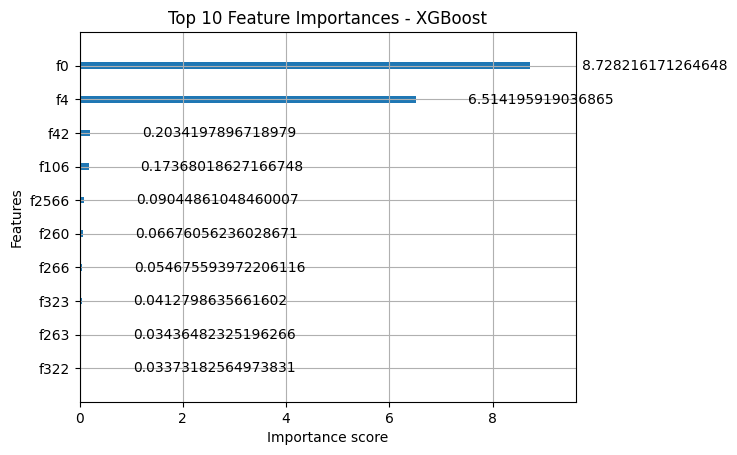

In [209]:
# Plot feature importance
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances - XGBoost")
plt.show()

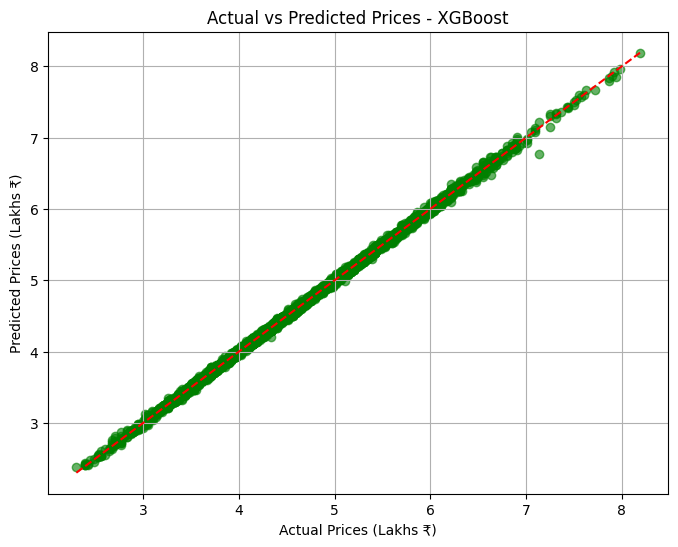

In [210]:
# ✅ 1. Actual vs. Predicted Prices Scatter Plot

# For the best model – use predictions from XGBoost or any best model you chose
plt.figure(figsize=(8, 6))
plt.scatter(y, y_xgb_pred, alpha=0.6, color='green')
plt.xlabel("Actual Prices (Lakhs ₹)")
plt.ylabel("Predicted Prices (Lakhs ₹)")
plt.title("Actual vs Predicted Prices - XGBoost")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Perfect prediction line
plt.grid(True)
plt.show()

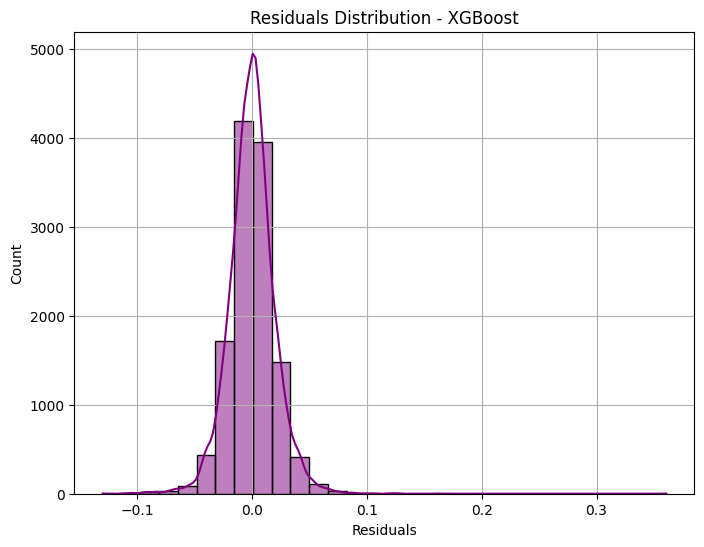

In [211]:
# ✅ 2. Residual Plot: Residuals = Actual - Predicted. A good model should have residuals centered around 0 without any clear pattern.

residuals = y - y_xgb_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title("Residuals Distribution - XGBoost")
plt.xlabel("Residuals")
plt.grid(True)
plt.show()

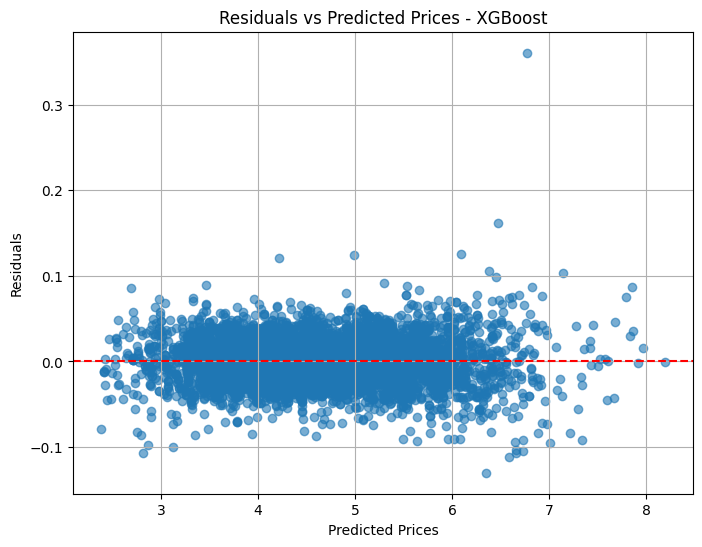

In [212]:
# Optional: Scatter plot of residuals vs predicted values

plt.figure(figsize=(8, 6))
plt.scatter(y_xgb_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Prices - XGBoost")
plt.grid(True)
plt.show()

In [214]:
df.columns

Index(['area_type', 'size', 'society', 'total_sqft', 'bath', 'balcony',
       'price', 'bhk', 'price_per_sqft', 'location_1st Phase JP Nagar',
       ...
       'availability_21-Nov', 'availability_21-Oct', 'availability_21-Sep',
       'availability_22-Dec', 'availability_22-Jan', 'availability_22-Jun',
       'availability_22-Mar', 'availability_22-May', 'availability_22-Nov',
       'availability_Ready To Move'],
      dtype='object', length=310)

In [216]:
# ✅ 1. Which locations have the highest price per square foot?

# Group by location and sort by descending price per sqft
location_price_stats = df.groupby('location_1st Phase JP Nagar')['price_per_sqft'].mean().sort_values(ascending=False)

# Display top 10 locations with highest price per sqft
top_10_locations = location_price_stats.head(10)
print(top_10_locations)


location_1st Phase JP Nagar
True     9.100000
False    8.634819
Name: price_per_sqft, dtype: float64


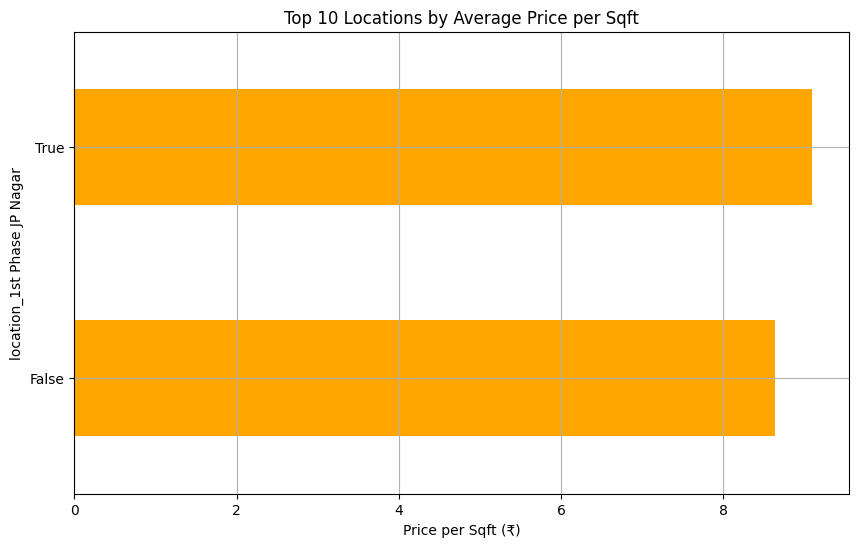

In [217]:
# Bar plot of top 10 locations
plt.figure(figsize=(10, 6))
top_10_locations.plot(kind='barh', color='orange')
plt.title("Top 10 Locations by Average Price per Sqft")
plt.xlabel("Price per Sqft (₹)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

In [54]:
# Practice
import pandas as pd

data = {
    'size': ['2 BHK', '4 Bedroom', '3 BHK', '1 BHK', '5 BHK', 'Studio'],
    'total_sqft': ['1000', '2500', '800-1000', '600', '3500', 'abc']
}

df = pd.DataFrame(data)
df


,size,total_sqft
0,2 BHK,1000
1,4 Bedroom,2500
2,3 BHK,800-1000
3,1 BHK,600
4,5 BHK,3500
5,Studio,abc


In [55]:
df.isnull().sum()

size          0
total_sqft    0
dtype: int64

In [57]:
df.dtypes

size          object
total_sqft    object
dtype: object

🔧 Your Tasks
✅ Extract bhk (number of bedrooms) from the size column.
✅ Clean total_sqft:
Convert '800-1000' → 900
Convert 'abc' → None or np.nan
✅ Drop rows where total_sqft could not be converted to number.
✅ Add a new column price_per_sqft = Assume price column is:

In [64]:
# 2. ✅ Extract bhk (number of bedrooms) from the size column.
import numpy as np
def extract_bhk(x):
    try:
        return int(x.split(' ')[0])
    except:
        return None  # or np.nan if you've imported numpy

df['bhk'] = df['size'].apply(extract_bhk)
df

,size,total_sqft,bhk
0,2 BHK,1000,2.0
1,4 Bedroom,2500,4.0
2,3 BHK,800-1000,3.0
3,1 BHK,600,1.0
4,5 BHK,3500,5.0
5,Studio,abc,NaN


In [67]:
# 🔹 Step 2.1: Define a cleaning function

def clean_sqft(x):
    try:
        if '-' in x:
            low, high = x.split('-')
            return (float(low) + float(high)) / 2
        return float(x)
    except:
        return None

# 🔹 Step 2.2: Apply the function
df['total_sqft_cleaned'] = df['total_sqft'].apply(clean_sqft)
df

,size,total_sqft,bhk,total_sqft_cleaned
0,2 BHK,1000,2.0,1000.0
1,4 Bedroom,2500,4.0,2500.0
2,3 BHK,800-1000,3.0,900.0
3,1 BHK,600,1.0,600.0
4,5 BHK,3500,5.0,3500.0
5,Studio,abc,NaN,NaN


In [69]:
# 🧹 Step 3: Remove Outliers

# 🔹 Step 3.1: Remove entries with < 300 sqft per BHK
df = df[df['total_sqft_cleaned'] / df['bhk'] >= 300]
# 🔹 Step 3.2: Remove homes with very large area (> 10,000 sqft)
df = df[df['total_sqft_cleaned'] <= 10000]
df

,size,total_sqft,bhk,total_sqft_cleaned
0,2 BHK,1000,2.0,1000.0
1,4 Bedroom,2500,4.0,2500.0
2,3 BHK,800-1000,3.0,900.0
3,1 BHK,600,1.0,600.0
4,5 BHK,3500,5.0,3500.0


📌 Explanation:
Price is in lakhs, so we convert to ₹ by * 100000.
Divide by total_sqft to get ₹ per square foot.